<a name="1"></a>
## 1 - Importo Librerias

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import random
from unidecode import unidecode


%matplotlib inline

In [2]:
import string
import re
import nltk
nltk.download('twitter_samples')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords, twitter_samples, wordnet
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 2 - Importo la Data

### 2.1 - Cargo los datos

In [3]:
data = pd.read_csv("sentiment_integrado.csv")
data.head(10)

,Unnamed: 0,id,texto,sentimiento,Cantidad palabras,cant caracteres especiales,cant menciones,cant hashtags
0,0,142389495503925248,"Salgo de #VeoTV , que día más largoooooo...",Indefinido,8,4,0,1
1,1,142389933619945473,@PauladeLasHeras No te libraras de ayudar me/n...,Neutral,10,2,1,0
2,2,142391947707940864,@marodriguezb Gracias MAR,Positivo,3,0,1,0
3,3,142416095012339712,"Off pensando en el regalito Sinde, la que se v...",Negativo,24,4,0,0
4,4,142422495721562112,Conozco a alguien q es adicto al drama! Ja ja ...,Positivo,15,2,0,0
5,5,142424715175280640,"RT @FabHddzC: Si amas a alguien, déjalo libre....",Indefinido,16,6,2,0
6,6,142483342040907776,Toca @crackoviadeTV3 . Grabación dl especial N...,Positivo,8,5,1,0
7,7,142493511634259968,Hoy asisitiré en Madrid a un seminario sobre l...,Indefinido,16,1,0,0
8,8,142494476051562496,Buen día todos! Lo primero mandar un abrazo gr...,Positivo,25,2,1,0
9,9,142496796416016384,Desde el escaño. Todo listo para empezar #endi...,Positivo,12,6,0,1


In [4]:
data = data.dropna(subset=['texto'])

In [5]:
data.value_counts("sentimiento")

sentimiento
Negativo      5798
Positivo      5680
Indefinido    3500
Neutral       2091
Name: count, dtype: int64

In [6]:
data['sentimiento'] = data['sentimiento'].replace('Indefinido', 'Neutral')

<ipython-input-6-ca9ecc600760>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentimiento'] = data['sentimiento'].replace('Indefinido', 'Neutral')


In [7]:
tf_count = data.value_counts("sentimiento")
tf_count

sentimiento
Negativo    5798
Positivo    5680
Neutral     5591
Name: count, dtype: int64

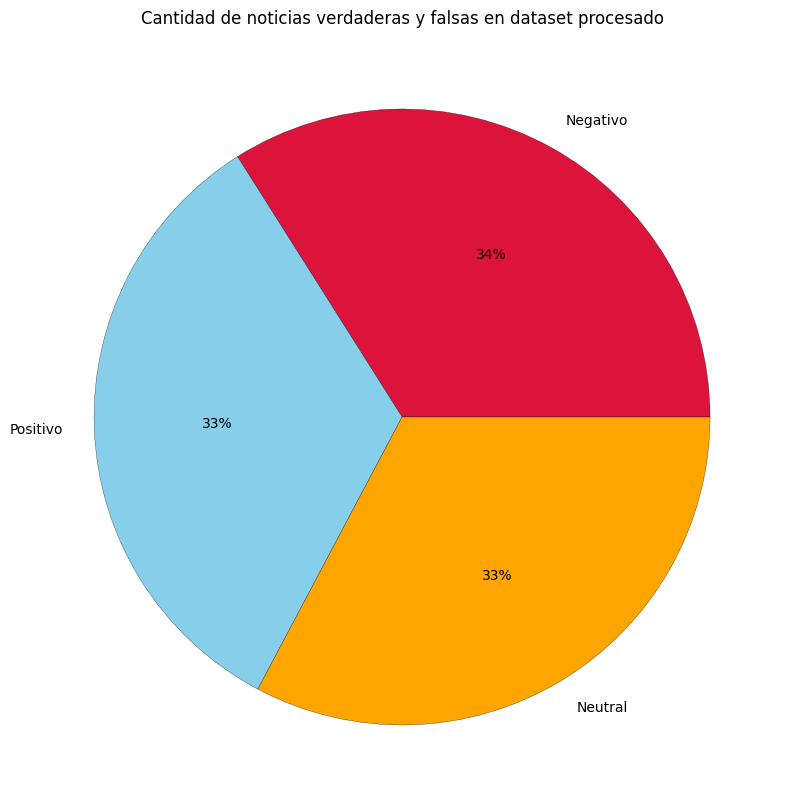

In [8]:
plt.figure(figsize=(10,10))
plt.pie(tf_count, labels=["Negativo", "Positivo","Neutral"],autopct="%1.f%%", colors=["crimson","skyblue", "orange"], wedgeprops={'linewidth': 0.2, 'edgecolor': 'black'})

plt.title("Cantidad de noticias verdaderas y falsas en dataset procesado")

plt.show()

### 2.2 - Procesamiento del Texto

In [10]:
stopwords_spanish = stopwords.words('spanish')
lemmatizer = WordNetLemmatizer()

In [11]:
def process_tweet(tweet):
    '''
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet

    '''
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'RT', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    tweet = re.sub(r'@', '', tweet)

    # replace repited letters
    pattern = re.compile(r'(.)\1{2,}')
    tweet = pattern.sub(r'\1', tweet)


    return tweet

In [12]:
def load_tweets(data):
    tweets_positivos = data.loc[data['sentimiento'] == 'Positivo', 'texto'].tolist()
    tweets_negativos= data.loc[data['sentimiento'] == 'Negativo', 'texto'].tolist()
    tweets_neutrales = data.loc[data['sentimiento'] == 'Neutral', 'texto'].tolist()
    return tweets_positivos, tweets_negativos,tweets_neutrales

In [13]:
all_positive_tweets, all_negative_tweets,all_neutral_tweets = load_tweets(data)
print(f"The number of positive tweets: {len(all_positive_tweets)}")
print(f"The number of negative tweets: {len(all_negative_tweets)}")
print(f"The number of neutral tweets: {len(all_neutral_tweets)}")

The number of positive tweets: 5680
The number of negative tweets: 5798
The number of neutral tweets: 5591


Observamos algunos tweets de ejemplos

In [14]:
# Change the tweet number to any number between 0 and 4999 to see a different pair of tweets.
tweet_number = random.randint(0, len(all_neutral_tweets) - 1)
print('Positive tweet example:')
print(all_positive_tweets[tweet_number])
print('\nNegative tweet example:')
print(all_negative_tweets[tweet_number])
print('\nNeutral tweet example:')
print(all_neutral_tweets[tweet_number])

Positive tweet example:
Sería lindo pertenecer a la lista @mariobautista_

Negative tweet example:
Buenos dias a todos!! Lamento tener que posponer hoy stream. Amanecí con la garganta súper inflamada y me duele bastante

Neutral tweet example:
Decidle a los de spoti que vuelvan a poner la versión acústica de Creep  @radiohead


In [15]:
# Process all the tweets: tokenize the string, remove tickers, handles, punctuation and stopwords, stem the words
all_positive_tweets_processed = [process_tweet(tweet) for tweet in all_positive_tweets]
all_negative_tweets_processed = [process_tweet(tweet) for tweet in all_negative_tweets]
all_neutral_tweets_processed = [process_tweet(tweet) for tweet in all_neutral_tweets]

Observamos a los tweets luego de ser procesados.

In [16]:
# Change the tweet number to any number between 0 and 4999 to see a different pair of tweets.
print('Positive tweet example:')
print(all_positive_tweets_processed[tweet_number])
print('\nNegative tweet example:')
print(all_negative_tweets_processed[tweet_number])
print('\nNeutral tweet example:')
print(all_neutral_tweets_processed[tweet_number])

Positive tweet example:
Sería lindo pertenecer a la lista mariobautista_

Negative tweet example:
Buenos dias a todos!! Lamento tener que posponer hoy stream. Amanecí con la garganta súper inflamada y me duele bastante

Neutral tweet example:
Decidle a los de spoti que vuelvan a poner la versión acústica de Creep  radiohead


#### Almaceno el dataset

In [17]:
data['texto'] =  data['texto'].apply(process_tweet)

In [18]:
data = data[['texto','sentimiento']]

In [19]:
data

,texto,sentimiento
0,"Salgo de VeoTV , que día más largo.",Neutral
1,PauladeLasHeras No te libraras de ayudar me/no...,Neutral
2,marodriguezb Gracias MAR,Positivo
3,"Off pensando en el regalito Sinde, la que se v...",Negativo
4,Conozco a alguien q es adicto al drama! Ja ja ...,Positivo
...,...,...
17065,"rebélate iunida cayo_lara ""¿Dinero a los banco...",Negativo
17066,". cayo_lara: ""La prima de riesgo es la niña de...",Negativo
17067,cayo_lara Vuestra propuesta decreación de empl...,Positivo
17068,"rebelate iunida cayo_lara: ""La prima de riesgo...",Negativo


In [20]:
data.to_csv('sentiment_clean.csv', index=False)